<a href="https://colab.research.google.com/github/ciroalegretti/colab/blob/main/pureConvection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pure convection of a sine function

import numpy as np

nx = 101                                    # Grid points
x = np.linspace(0,1,nx)                     # 1D Domain
dx = 1./(nx - 1)                            # Grid step

a = x.copy()                                # Scalar field

for i in range(len(a)):
  a[i] = 0.5 + 0.3*np.sin(2*np.pi*x[i])     # Initial condition

import matplotlib.pyplot as plt

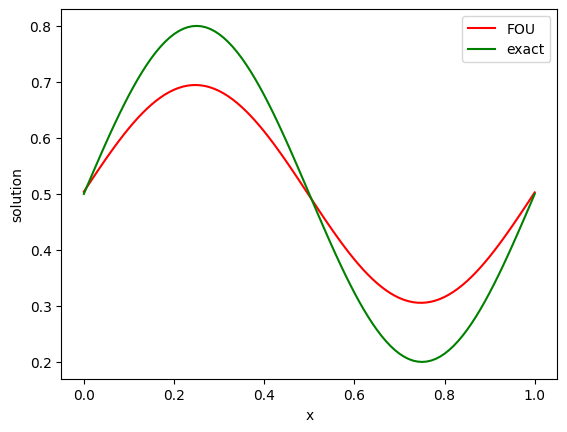

In [ ]:
cfl = 0.1                                   # CFL condition

dt = cfl*dx                                 # Time-step
t = 0                                       # Initial time
#print('dt = {:.4f}'.format(dt))            # Print time-step
#print('dx = {:.4f}'.format(dx))            # Print grid-step

A = np.zeros((nx,nx))
b = np.zeros((nx))

# Implicit scheme
while t <= 2.:

  aOld = a.copy()                           # Store current aproximation
  a[0] = aOld[-1]

  # Periodic BC at the first node
  #A[0,1] = dt/dx
  #b[0] = a[0] - (1 - dt/dx)*aOld[-1]
  
  A[0,0] = 1.
  b[0] = aOld[-1]
  
  # Update Coef. Matrix and b
  for i in range(1,nx):
    
    A[i,i] = 1 + dt/dx
    A[i,i-1] = - dt/dx
    b[i] = aOld[i]
  
  # Solve
  a = np.linalg.solve(A,b)

  t += dt
  x[:] += dt

sol_analitica = a.copy()
for i in range(len(sol_analitica)):
  sol_analitica[i] = 0.5 + 0.3*np.sin(2*np.pi*(x[i] - t))     # Final exact solution

plt.xlabel('x')
plt.ylabel('solution')
plt.plot(x - t ,a,'r',label='FOU')
plt.plot(x - t,sol_analitica,'g',label='exact')
plt.legend()